In [5]:
import pandas as pd
video_stats = pd.read_csv("C:\\Users\\karti\\OneDrive\\Desktop\\Project Prototype\\Youtube\\Data set\\videos-stats.csv", sep=",", skipinitialspace=True)

In [7]:
video_stats.shape


(1881, 8)

In [8]:
video_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1881 non-null   int64  
 1   Title         1881 non-null   object 
 2   Video ID      1881 non-null   object 
 3   Published At  1881 non-null   object 
 4   Keyword       1881 non-null   object 
 5   Likes         1879 non-null   float64
 6   Comments      1879 non-null   float64
 7   Views         1879 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.7+ KB


In [9]:
video_stats.describe()


,Unnamed: 0,Likes,Comments,Views
count,1881.000000,1.879000e+03,1879.000000,1.879000e+03
mean,940.000000,1.700610e+05,7863.331559,1.161292e+07
std,543.142247,7.962293e+05,37879.964926,1.084450e+08
min,0.000000,-1.000000e+00,-1.000000,2.500000e+01
25%,470.000000,2.672500e+03,199.000000,8.451500e+04
50%,940.000000,1.478700e+04,814.000000,5.917210e+05
75%,1410.000000,6.090600e+04,3377.500000,2.804978e+06
max,1880.000000,1.644556e+07,732818.000000,4.034122e+09


In [10]:
video_stats.describe(include="all")


,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
count,1881.000000,1881,1881,1881,1881,1.879000e+03,1879.000000,1.879000e+03
unique,NaN,1854,1840,757,41,NaN,NaN,NaN
top,NaN,What is Machine Learning?,#NAME?,24-08-2022,crypto,NaN,NaN,NaN
freq,NaN,4,30,288,50,NaN,NaN,NaN
mean,940.000000,NaN,NaN,NaN,NaN,1.700610e+05,7863.331559,1.161292e+07
std,543.142247,NaN,NaN,NaN,NaN,7.962293e+05,37879.964926,1.084450e+08
min,0.000000,NaN,NaN,NaN,NaN,-1.000000e+00,-1.000000,2.500000e+01
25%,470.000000,NaN,NaN,NaN,NaN,2.672500e+03,199.000000,8.451500e+04
50%,940.000000,NaN,NaN,NaN,NaN,1.478700e+04,814.000000,5.917210e+05
75%,1410.000000,NaN,NaN,NaN,NaN,6.090600e+04,3377.500000,2.804978e+06


In [11]:
video_stats.isnull().sum()

Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [13]:
video_stats = video_stats.dropna()


In [36]:
video_stats['PubYear'] = video_stats['Published At'].astype(str).str[:4].astype('category')
video_stats['Published At'] = pd.to_datetime(video_stats['Published At'], format='%Y-%m-%d')

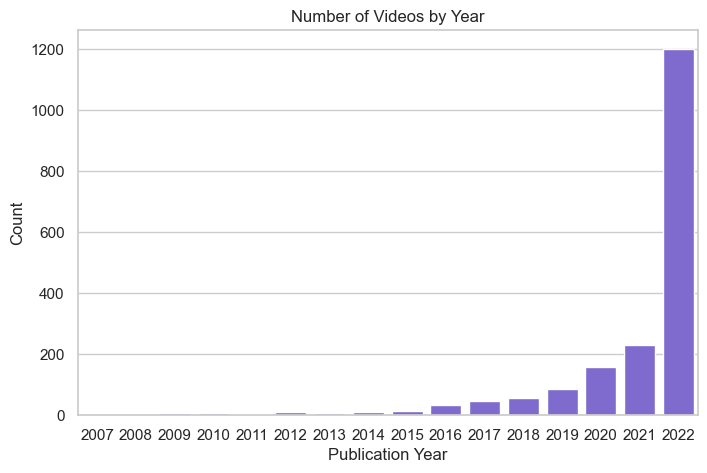

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=video_stats, x="PubYear", color="#765add")

# Add labels and title
plt.title("Number of Videos by Year")
plt.xlabel("Publication Year")
plt.ylabel("Count")

# Show the plot
plt.show()

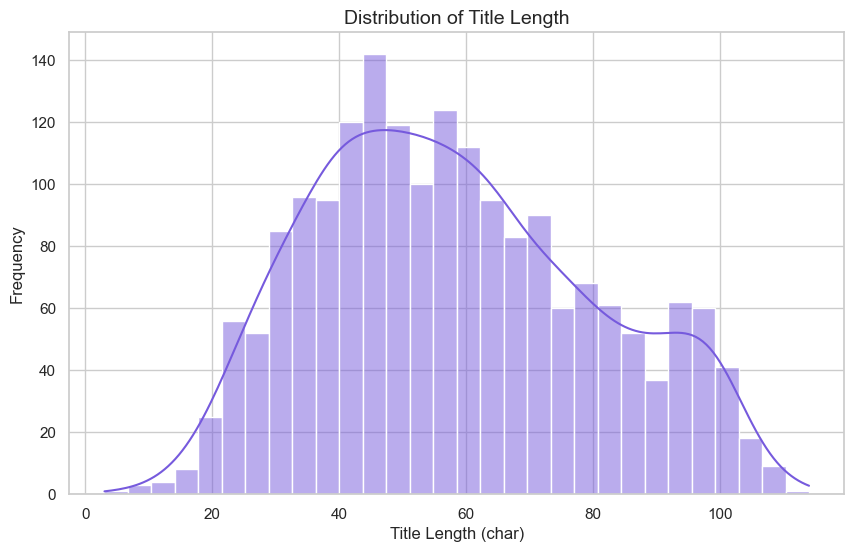

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for clean visualization
sns.set_theme(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(video_stats["TitleLen"], bins=30, color="#765add", kde=True)

# Customize labels and title
plt.title("Distribution of Title Length", fontsize=14)
plt.xlabel("Title Length (char)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Set Plotly to open in browser (best for VS Code)
pio.renderers.default = "browser"


# Group by 'PubYear' and 'Keyword', summing comments and scaling by 1000
df_grouped = video_stats.groupby(['PubYear', 'Keyword'], as_index=False)['Comments'].sum()
df_grouped['total_comments'] = df_grouped['Comments'] / 1000  # Scale by 1,000

# Create an interactive Plotly line chart
fig = px.line(df_grouped, 
              x='PubYear', 
              y='total_comments', 
              color='Keyword',
              markers=True,  # Adds points
              title="Total Comments by Category Over Time (by 1k)",
              labels={"total_comments": "Comment Count", "PubYear": "Published Year"})

# Show interactive plot
fig.show()

C:\Users\karti\AppData\Local\Temp\ipykernel_28208\3166773576.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\karti\AppData\Local\Temp\ipykernel_28208\267522840.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



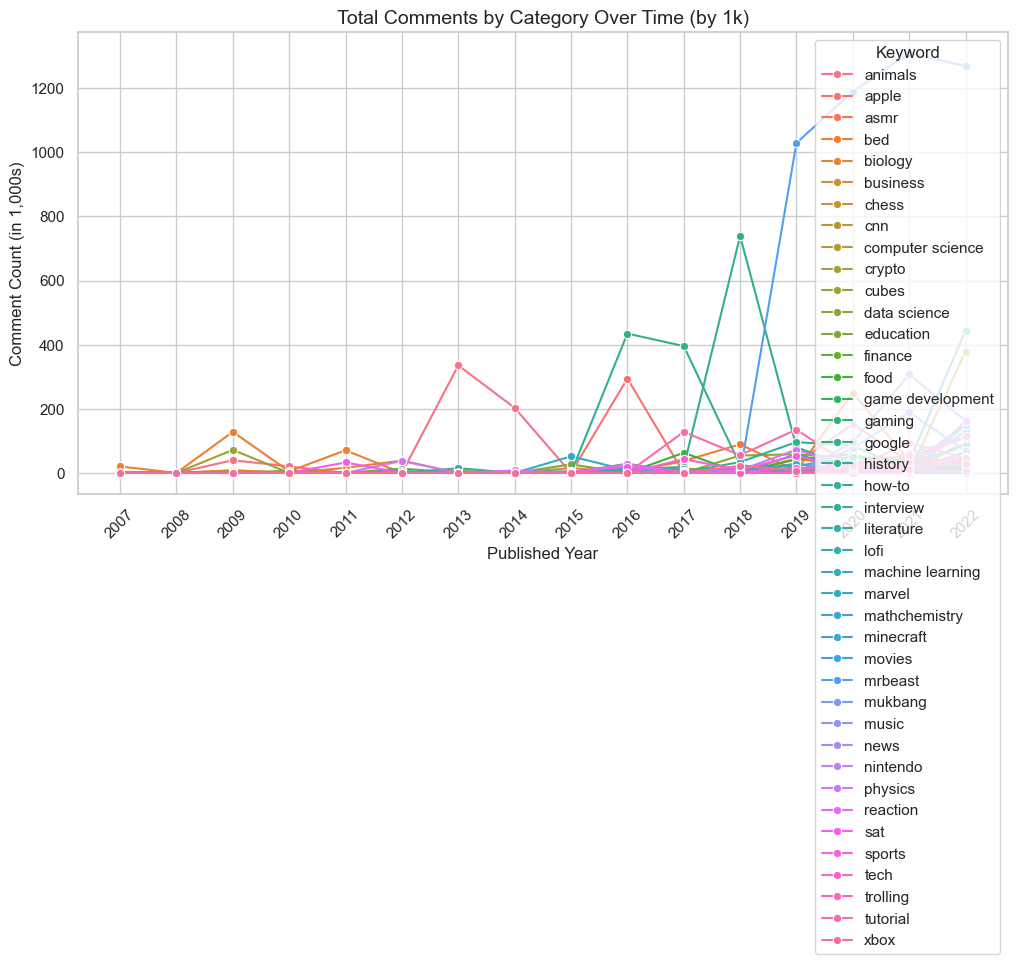

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'PubYear' and 'Keyword', summing comments and scaling by 1,000
df_grouped = video_stats.groupby(['PubYear', 'Keyword'], as_index=False)['Comments'].sum()
df_grouped['total_comments'] = df_grouped['Comments'] / 1000  # Scale by 1,000

# Set theme for a clean visualization
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='PubYear', y='total_comments', hue='Keyword', marker="o")

# Customize labels and title
plt.title("Total Comments by Category Over Time (by 1k)", fontsize=14)
plt.xlabel("Published Year", fontsize=12)
plt.ylabel("Comment Count (in 1,000s)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Keyword")

# Show the plot
plt.show()


In [67]:
import pandas as pd
import plotly.express as px

# Group by 'PubYear' and 'Keyword', then calculate the average title length
df_grouped = video_stats.groupby(['PubYear', 'Keyword'], as_index=False)['TitleLen'].mean()
df_grouped.rename(columns={'TitleLen': 'avg_len'}, inplace=True)

# Create an interactive line plot using Plotly
fig = px.line(df_grouped, 
              x='PubYear', 
              y='avg_len', 
              color='Keyword',
              markers=True, 
              title="Avg Title Length by Category Over Time",
              labels={"avg_len": "Avg Title Length (char)", "PubYear": "Published Year"},
              template="plotly_white")

# Show the interactive plot in VS Code
import plotly.io as pio
pio.renderers.default = "browser"  # Change to 'browser' if needed

fig.show()


C:\Users\karti\AppData\Local\Temp\ipykernel_28208\4015795516.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\karti\AppData\Local\Temp\ipykernel_28208\607360144.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



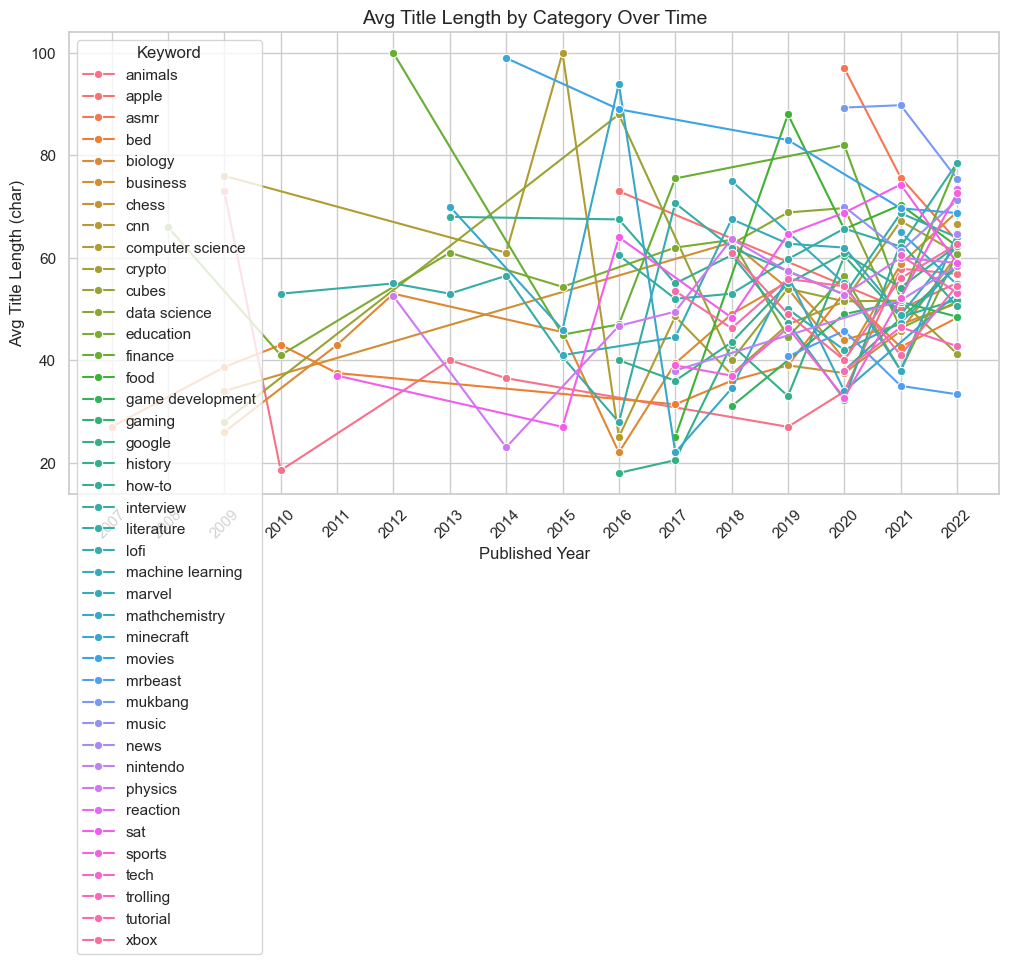

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'PubYear' and 'Keyword', then calculate the average title length
df_grouped = video_stats.groupby(['PubYear', 'Keyword'], as_index=False)['TitleLen'].mean()
df_grouped.rename(columns={'TitleLen': 'avg_len'}, inplace=True)

# Set theme for clean visualization
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='PubYear', y='avg_len', hue='Keyword', marker="o")

# Customize labels and title
plt.title("Avg Title Length by Category Over Time", fontsize=14)
plt.xlabel("Published Year", fontsize=12)
plt.ylabel("Avg Title Length (char)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Keyword")

# Show the plot
plt.show()


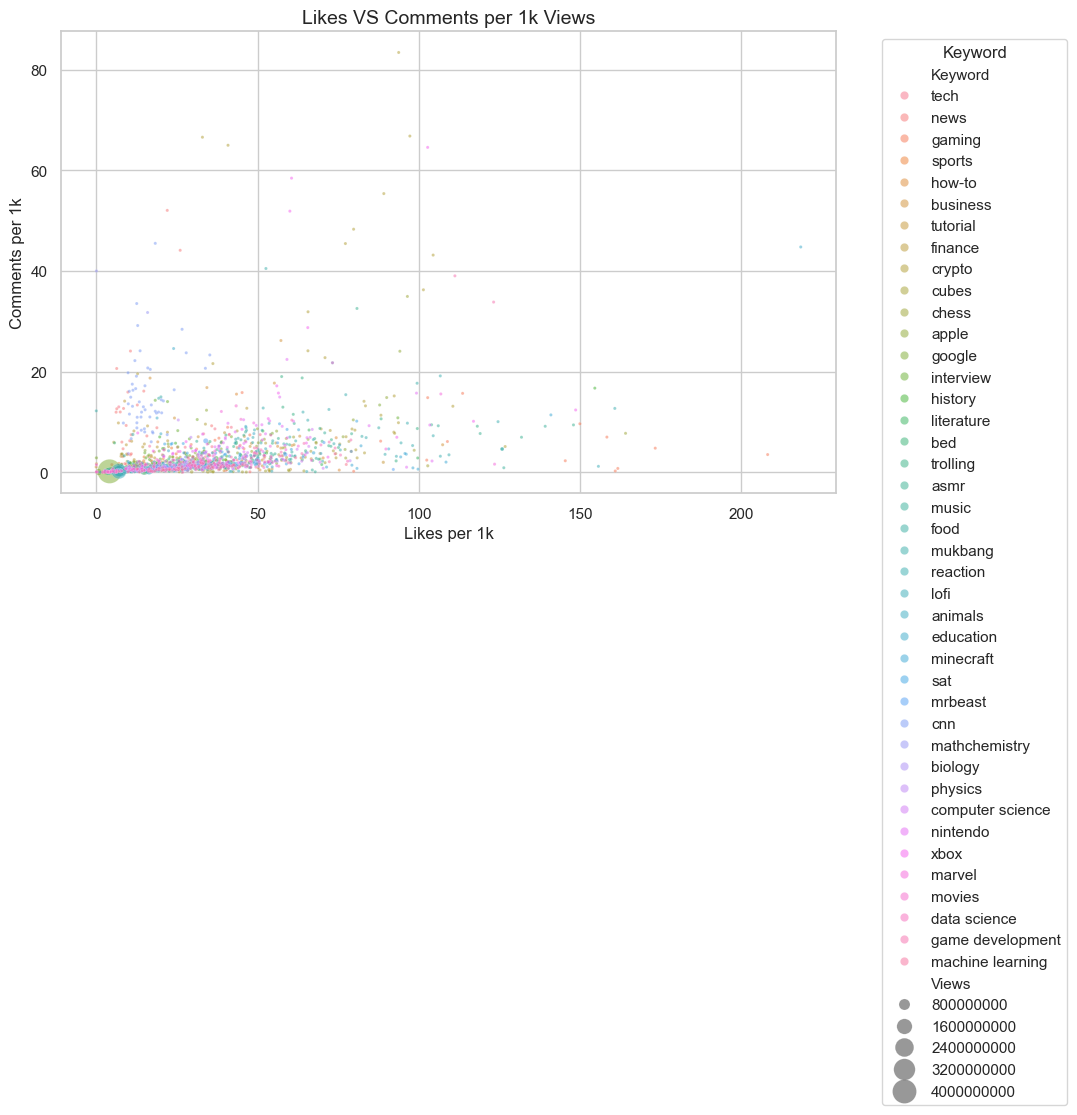

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for clean visualization
sns.set_theme(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=video_stats, 
    x="LikesPer1k", 
    y="CommentsPer1k", 
    hue="Keyword", 
    size="Views", 
    sizes=(5, 300),  # Adjusting size scale for better visibility
    alpha=0.5  # Set transparency for better overlapping visibility
)

# Customize labels and title
plt.title("Likes VS Comments per 1k Views", fontsize=14)
plt.xlabel("Likes per 1k", fontsize=12)
plt.ylabel("Comments per 1k", fontsize=12)
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside

# Show the plot
plt.show()


In [61]:
import plotly.express as px

pio.renderers.default = "browser"
# Create an interactive scatter plot
fig = px.scatter(
    video_stats, 
    x="LikesPer1k", 
    y="CommentsPer1k", 
    color="Keyword", 
    size="Views", 
    size_max=70,  # Max size of bubbles
    opacity=0.5,  # Transparency for better visibility
    hover_data={
        "LikesPer1k": True,
        "CommentsPer1k": True,
        "Views": ":,.0f",  # Format views with comma separator
        "Keyword": True
    },
    title="Likes VS Comments per 1k Views"
)

# Customize axes labels
fig.update_layout(
    xaxis_title="Likes per 1k",
    yaxis_title="Comments per 1k",
    legend_title="Keyword"
)

# Show interactive plot
fig.show()


In [69]:
print(video_stats["Published At"].head())  # Check the format
print(video_stats["PubYear"].unique())    # Check unique values


0   2022-08-23
1   2022-08-24
2   2022-08-23
3   2022-08-23
4   2022-08-08
Name: Published At, dtype: datetime64[ns]
['2022', '2021', '2020', '2018', '2019', ..., '2014', '2010', '2007', '2011', '2008']
Length: 16
Categories (16, object): ['2007', '2008', '2009', '2010', ..., '2019', '2020', '2021', '2022']
